In [2]:
import keras_cv
import matplotlib.pyplot as plt

In [3]:
model = keras_cv.models.StableDiffusion(
    img_width=512, img_height=320, jit_compile=False
)

By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE


1356917/1356917 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
492466864/492466864 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step
3439090152/3439090152 ━━━━━━━━━━━━━━━━━━━━ 32s 0us/step
50/50 ━━━━━━━━━━━━━━━━━━━━ 162s 775ms/step
198180272/198180272 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


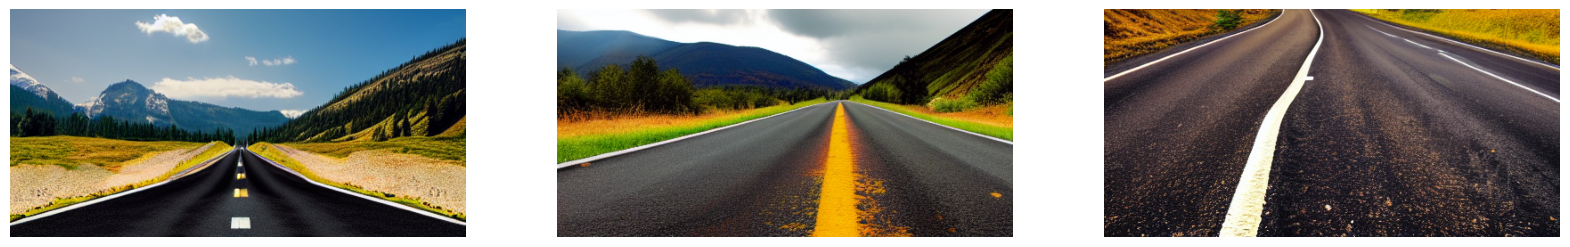

In [4]:
images = model.text_to_image("photograph of an empty road in nature", batch_size=3)


def plot_images(images):
    plt.figure(figsize=(20, 20))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.axis("off")


plot_images(images)

In [5]:
plt.savefig('ex1.png',dpi=300)

<Figure size 640x480 with 0 Axes>

50/50 ━━━━━━━━━━━━━━━━━━━━ 38s 769ms/step


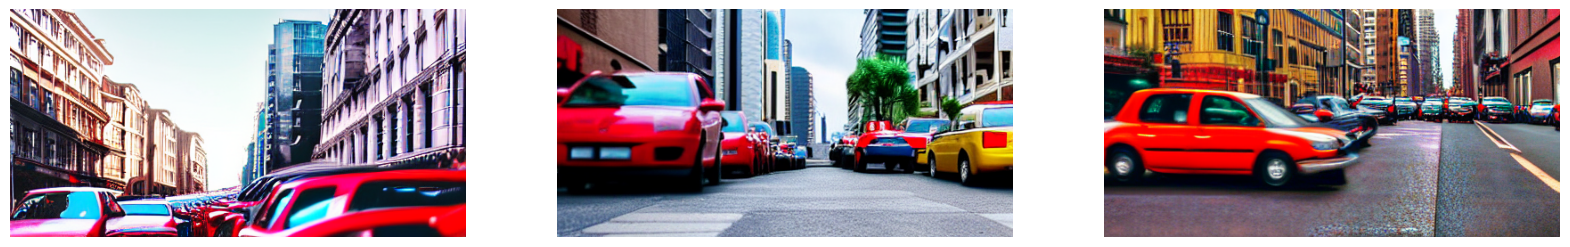

In [7]:
images2 = model.text_to_image(
    "a photograph of a street in the city, with many cars waiting in line in front of a red light,"
    "noon time, high quality, highly detailed, realistic, sharp focus",
    batch_size=3,
)
plot_images(images2)
plt.savefig('ex2.png',dpi=300)

In [ ]:
import requests
import torch
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

from diffusers import StableDiffusionImg2ImgPipeline

init_image = Image.open('./street.png').convert("RGB")
init_image = init_image.resize((768, 512))
device = "cuda"
model_id_or_path = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(model_id_or_path, torch_dtype=torch.float16)
pipe = pipe.to(device)


Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

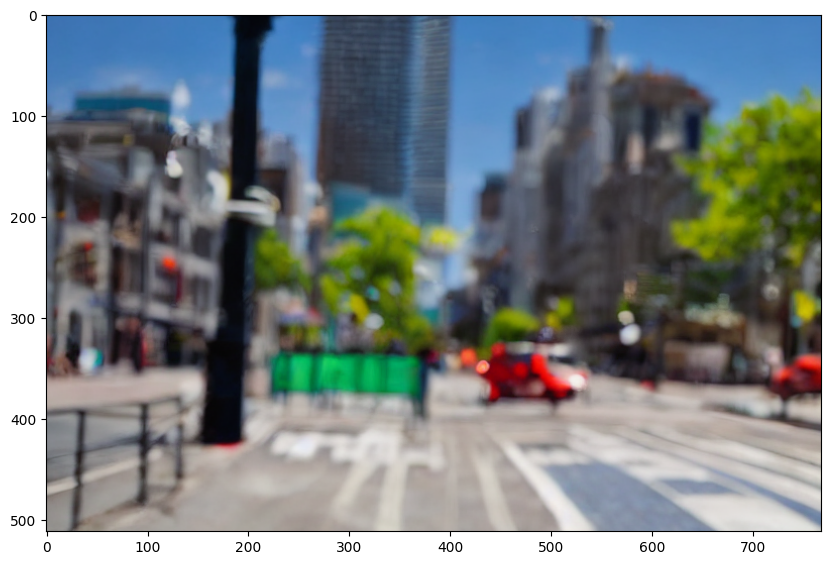

In [ ]:
prompt = "a photograph of a city street, sharp focus, realistic"
images = pipe(prompt=prompt, image=init_image, strength=0.75, guidance_scale=4.5).images
images[0].save("city_traffic2.png")
plt.figure(figsize=(10,10))
plt.imshow(images[0])

  0%|          | 0/35 [00:00<?, ?it/s]

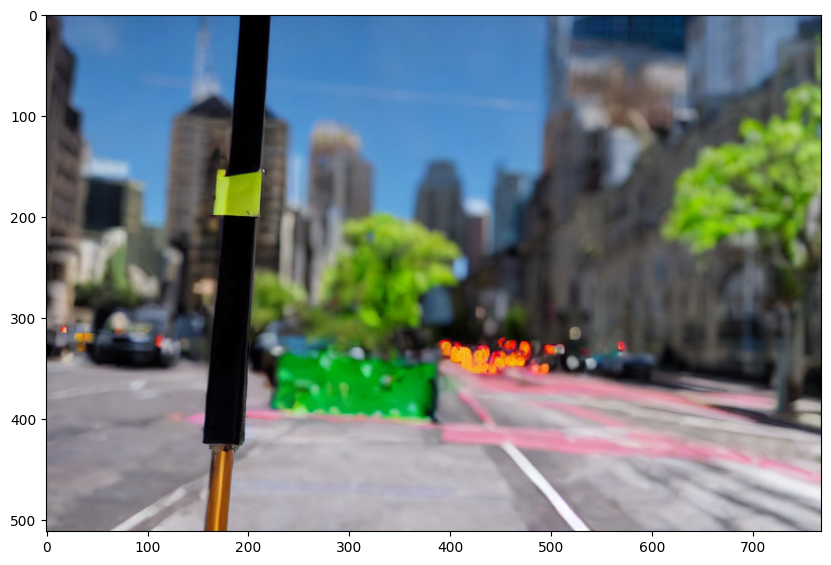

In [ ]:
prompt = "a photograph of city traffic, sharp focus"
images = pipe(prompt=prompt, image=init_image, strength=0.7, guidance_scale=2.5).images
images[0].save("city_traffic3.png")
plt.figure(figsize=(10,10))
plt.imshow(images[0])

  0%|          | 0/40 [00:00<?, ?it/s]

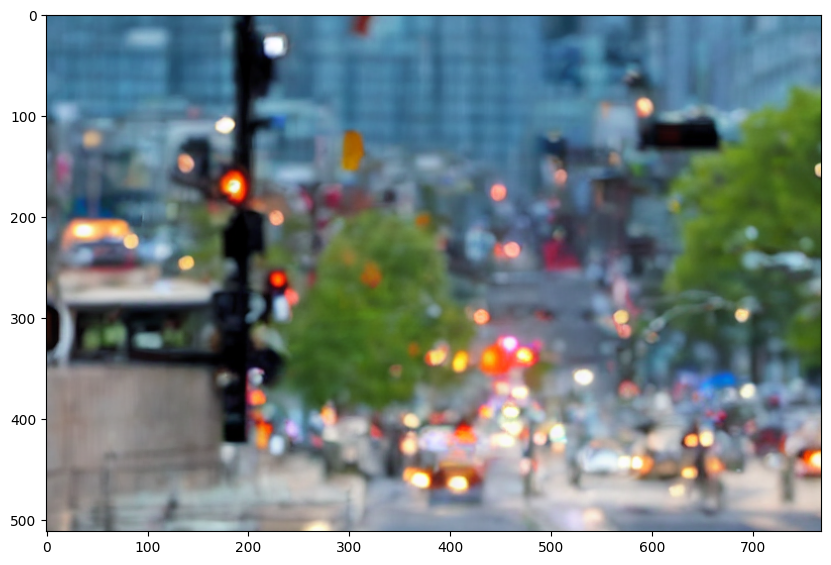

In [ ]:
prompt = "a photograph of city traffic, sharp focus"
images = pipe(prompt=prompt, image=init_image, strength=0.8, guidance_scale=2.5).images
images[0].save("city_traffic4.png")
plt.figure(figsize=(10,10))
plt.imshow(images[0])